# Mathematische Beschreibung der Ionenkonzentrationen


## Struktur des Modells

The following set of variables and equations is described for one ion species. It would be similar for multiple species, with the so far unknown part being how they influence each others rates across the membrane.

### Variablen
Zur Beschreibung der Zelle werden verschiedene Variable benötigt: 

### Zellumgebung und physische Eigenschaften
#### Zeit:  $\:t$

#### Volumen: 
* Außerhalb der Zelle: $\:V_{ext}$
* Zellvolumen: $\:V_{int}$
wobei $\:V_{ext}$ ein beliebiges festes Volumen außerhalb der Zelle ist, über das sich die Protonen effektiv verteilen.


#### Protonenkonzentrationen $\:c(t)$
* Außerhalb der Zelle $\:c_{ext}(t)$
* Innerhalb der Zelle $\:c_{int}(t)$
$\implies$ Daraus entsteht der Konzentrationsgradient $\varDelta c = c_{int} - c_{ext} $

### ?...? Zelleigenschaften
#### (Diffusions-) Raten $\:v(\varDelta c,\:...)$
Über die Zellwand werden Protonen transportirt oer diffundieren anderweitig durch die Membran. Der gesamte Protonenfluss $v$ setzt sich zusammen aus: 
* Atmungskette $\:v_{res}$
* ATP-Synthase $\:v_{ATP}$
* Einige Basisraten über den Rest der Membran $\:v_{mem}$
* Unser Protonenkanal $\:v_{ch}$

$$\implies v = \sum_{i \in C} v_i = v_{res} + v_{ATP} + v_{ch} + v_{mem} $$

where we call the set of  $\:(res,\:ATP,\:ch,\:mem) = C$ and with the $v_i$ each directed inward.

## Gleichungen

Der Ansatz des Modells ist es, dass die Protonenbewegung über die Zellwand und der Konzentrationsgradient miteinander zusammen hängen. 

So entspricht die Konzentrationsänderung $\frac{\partial c_{int}}{\partial t}$ innerhalb bzw. $\frac{\partial c_{ext}}{\partial t}$  außerhalb der Zelle dem Protonenfluss durch:
$$\frac{\partial c_{int}}{\partial t} = \frac{v}{V_{int}} \qquad \mathrm{und} \qquad \frac{\partial c_{ext}}{\partial t} = - \frac{v}{V_{ext}}$$


For implementation, we introduce the spacial "coordinate" $x$ which can take the values 0 or 1 meaning inside or outside, respectively. Therefore, c, V and other variables can be used in code as c[0], V[1], ...

# Implementierung

In [5]:
import numpy as np
from scipy.integrate import odeint

## Parameter

In [6]:
# Innen- und Außenvolumen
V = [4, 6]

# Proportionalität der Diffusionsrate v
a = 0.8

## Funktionen

In [7]:
def v(c):
    gradc = c[1] - c[0]
    return a * gradc

def cdot(c, t):
    dcdt = [v(c)/V[0], -v(c)/V[1]]
    return dcdt

## Integration

### Anfangsbedingungen und Auflösung

In [8]:
# Anfangskonzentrations
c_0 = [1, 10]

# Zeitraum und Integrationsschritte
steps = 300
time = 10

### Lösung mit scipy.odeint

In [9]:
t = np.linspace(0, time, steps+1)
solution = odeint(cdot, c_0, t, args=())

## Visualisierung

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### Zeit-Konzentrations-Diagramm

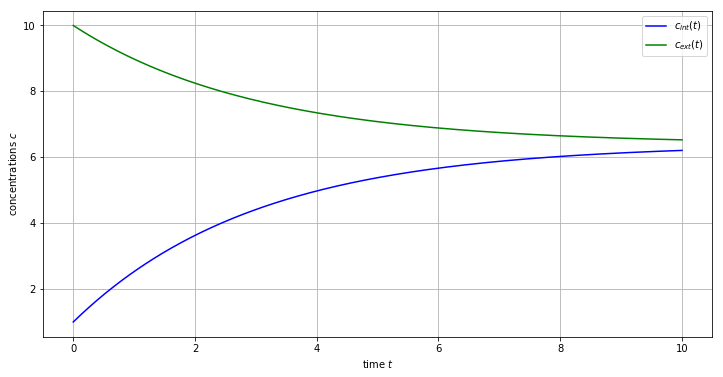

In [11]:
tc, tc_ax = plt.subplots(figsize=(12, 6))
plt.plot(t, solution[:, 0], 'b', label='$c_{int}(t)$')
plt.plot(t, solution[:, 1], 'g', label='$c_{ext}(t)$')
plt.legend(loc='best')
plt.xlabel('time $t$')
plt.ylabel('concentrations $c$')
plt.grid()
plt.show()
tc.savefig('./figures/time-conc-diagram.png')

### Räumliche Animation

In [12]:
# Zum Animieren in diesem notebook
%matplotlib notebook
from matplotlib import animation
from matplotlib.animation import FuncAnimation

# Array für Bild definieren
height = 400
width = 400

# half-height
hh = int(height/2)
# maximum concentration
maxconc = max([max([solution[x][0] for x in range(0,len(solution))]), 
               max([solution[x][1] for x in range(0,len(solution))])])

# Array mit Wert 0 initialisieren
image = np.zeros((height, width))
frame = image

<IPython.core.display.Javascript object>


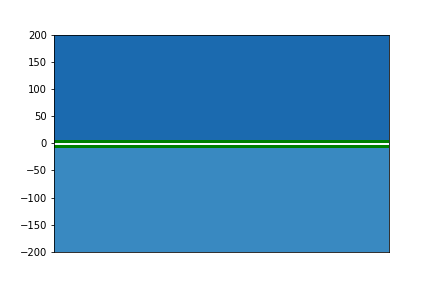

In [14]:
%matplotlib notebook

# Figure und Animation
memanim = plt.figure()

# Membran einzeichnen
quer, mem1, mem2 = [0, width], [-5, -5], [+5, +5]
plt.plot(quer, mem1, quer, mem2, color='green', lw=3, marker = None)

im=plt.imshow(image, interpolation='none', cmap='Blues', vmin=0, vmax=2,
              aspect='auto', extent=[0,width,-hh,hh])
plt.xticks([])

    
# Initialisierungsfunktion: Plottet für jeden Frame den Hintergrund
def init():
    return [image]

# Animationsfunktion: Wird sequenziell vom Animator aufgerufen
def animate(i):
    frame[0 : hh-5, 0 : width] = solution[i][1]/maxconc*1.5+0.5
    frame[hh+5 : height, 0 : width] = solution[i][0]/maxconc*1.5+0.5
    
    im.set_array(frame)
    return [im]

# Animator aufrufen
# blit=True damit nur veränderte Pixel neu gesetzt werden
anima = animation.FuncAnimation(memanim, animate, init_func=init, frames=steps, 
                               interval=int(time/steps*1000), blit=True)

# animation als *.mp4 speichern
#anima.save('./figures/animation_mem_conc.mp4', fps=30, 
#           extra_args=['-vcodec', 'libx264'])

# animation als *.gif speichern
# Unter Windows muss dafür evtl. ImageMagick installiert
# und der convert_path definiert werden, um *.gif s zu speichern
#plt.rcParams['animation.convert_path'] = '<path-to>/magick.exe'

writer = animation.ImageMagickFileWriter()
writer.fps = 30
#anima.save('./figures/animation_mem_conc.gif', writer=writer)

Animationen funktionieren nur beim Ausführen in jupyter notebook, nicht auf Github und nicht im PDF. Die Animation wird aber auch als *.mp4 und als *.gif gespeichert.